<a href="https://colab.research.google.com/github/hypnoticmeraj/Capstone-project-/blob/main/Meraj_Classification_Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Merajuddin


# **Project Summary -**

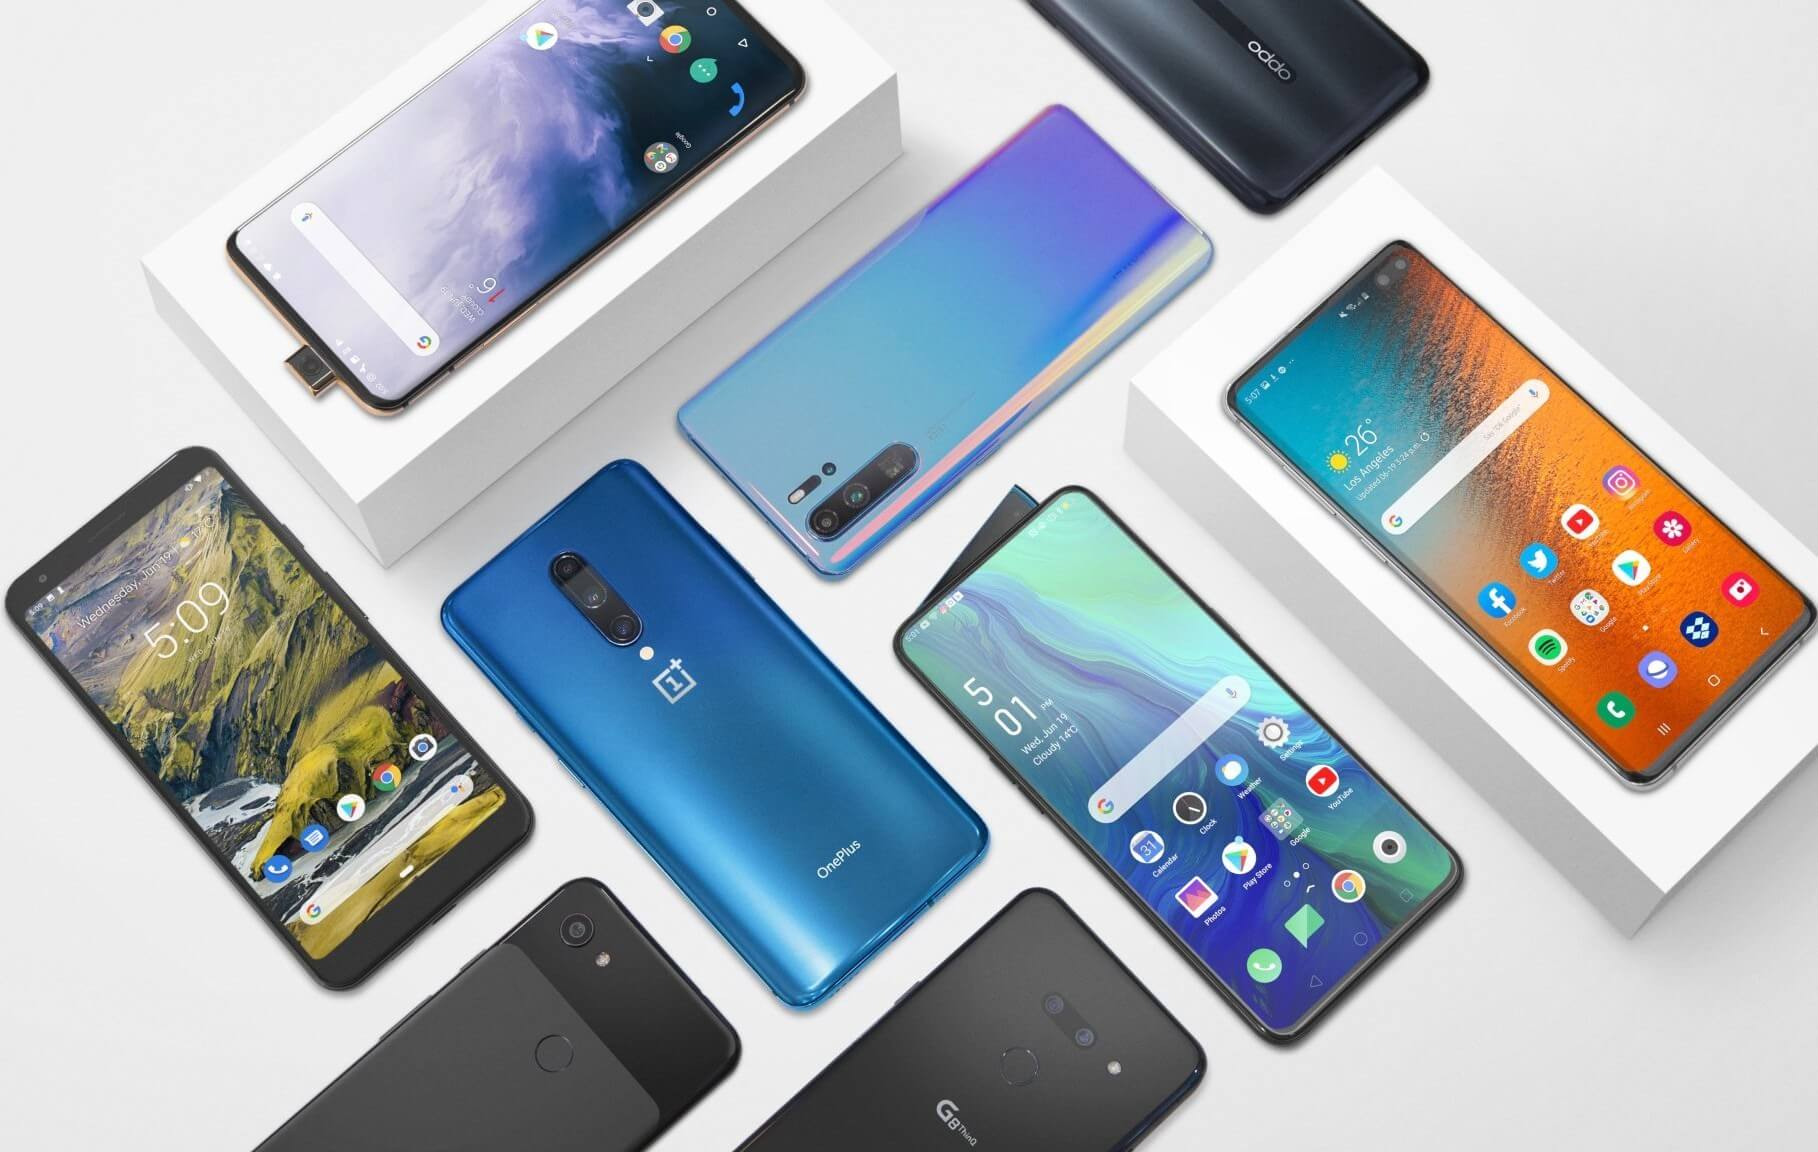

The mobile phone industry is highly competitive, and the price of a mobile phone is determined by various factors, including battery power, Bluetooth, camera quality, screen size, and more. In this context, a study was conducted to understand the factors influencing the price range of mobile phones. The study used a dataset containing around 21 variables to predict the price range of mobile phones, categorized as low, medium, high, and very high.

The first step in the analysis involved DATA WRANGLING, where missing values were handled and unique values were checked. The study identified that 180 phones had pixel resolution height as 0 and two phones had screen width in cm as 0. The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, the study replaced these 0 values with the mean values, ensuring that no missing values were left in the dataset.

Next, the study performed EXPLORATORY DATA ANALYSIS (EDA), which revealed that all category phones were distributed with equal price range. The analysis also indicated that battery capacity was positively correlated with the price range of mobile phones, and the distribution of battery capacity gradually increased with the price range. This suggested that consumers may be willing to pay more for a mobile phone with a higher battery capacity. The study found that almost half the devices had Bluetooth, and half did not.

The scatter plot showed a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This indicated that as the price range increased, the amount of RAM in the device generally increased as well. The study also found that the count of devices with dual sim was increasing for the very high price range. Additionally, the distribution of primary camera megapixels across different target categories was relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones.

The analysis of the screen size distribution among different target categories indicated that there was not a significant difference in the distribution, suggesting that screen size may not be the sole driving factor in determining the target categories. However, this uniformity in distribution can be advantageous for predictive modeling, as it implies that screen size may not be a significant variable in differentiating between different target categories, allowing other features to play a more crucial role in determining the target categories. The study also found that mobile phones with higher price ranges tended to be lighter in weight compared to lower price range phones.

After the EDA, the study performed HYPOTHESIS TESTING on three statements and handled outliers. The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. The study then performed FEATURE ENGINEERING and implemented Machine Learning Models such as LOGISTIC REGRESSION, RANDOM FOREST, and XGBoost. Based on the experiments, the study concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

In conclusion, the study found that the mobile phones in the dataset were divided into four different price ranges, each having a similar number of elements. Additionally, the study found that approximately half of the devices had Bluetooth, while the other half did not. Furthermore, the study found that as the price range increased, there was a gradual increase in battery power, and RAM showed continuous growth from low-cost to very high-cost phones. Moreover, the study found that the costly phones tend to be lighter than the lower-priced ones.

The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. Finally, the study found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provided the best performance in predicting the price range of mobile phones.

# **GitHub Link -**

https://github.com/hypnoticmeraj/Capstone-project-/blob/main/Meraj_Classification_Mobile_Price_Prediction.ipynb





# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict theactual price but a price range indicating how high the price is.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np            # numerical computations
import pandas as pd            # data analyze

import matplotlib.pyplot as plt        # data visualization
import seaborn as sns
import missingno as msno


import warnings
warnings.filterwarnings("ignore")

from scipy import stats


import statsmodels.stats.proportion as smprop

from sklearn.model_selection import train_test_split            # train-test-split
from sklearn.linear_model import LogisticRegression             # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier             # Random Forest Classifier model
from xgboost import XGBClassifier                               # XGB Classifier model
from sklearn.model_selection import GridSearchCV                            # Grid Search CV

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix          # evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/data_mobile_price_range.csv')

### Dataset First View

In [4]:
# Dataset First Look
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f' The shape of our dataset is {df.shape}')

 The shape of our dataset is (2000, 21)


In [6]:
print(f' The number of rows in our dataset is {df.shape[0]}')
print(f' The number of columns in our dataset is {df.shape[1]}')

 The number of rows in our dataset is 2000
 The number of columns in our dataset is 21


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [9]:
# Dataset Duplicate Value Count
print(f' The number of duplicates value present in our dataset is {df.duplicated().sum()}')

 The number of duplicates value present in our dataset is 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(f' The number of missing/null values present in our dataset is {df.isnull().sum()}')

 The number of missing/null values present in our dataset is battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Text(0.5, 1.0, 'Visualizing the missing values')

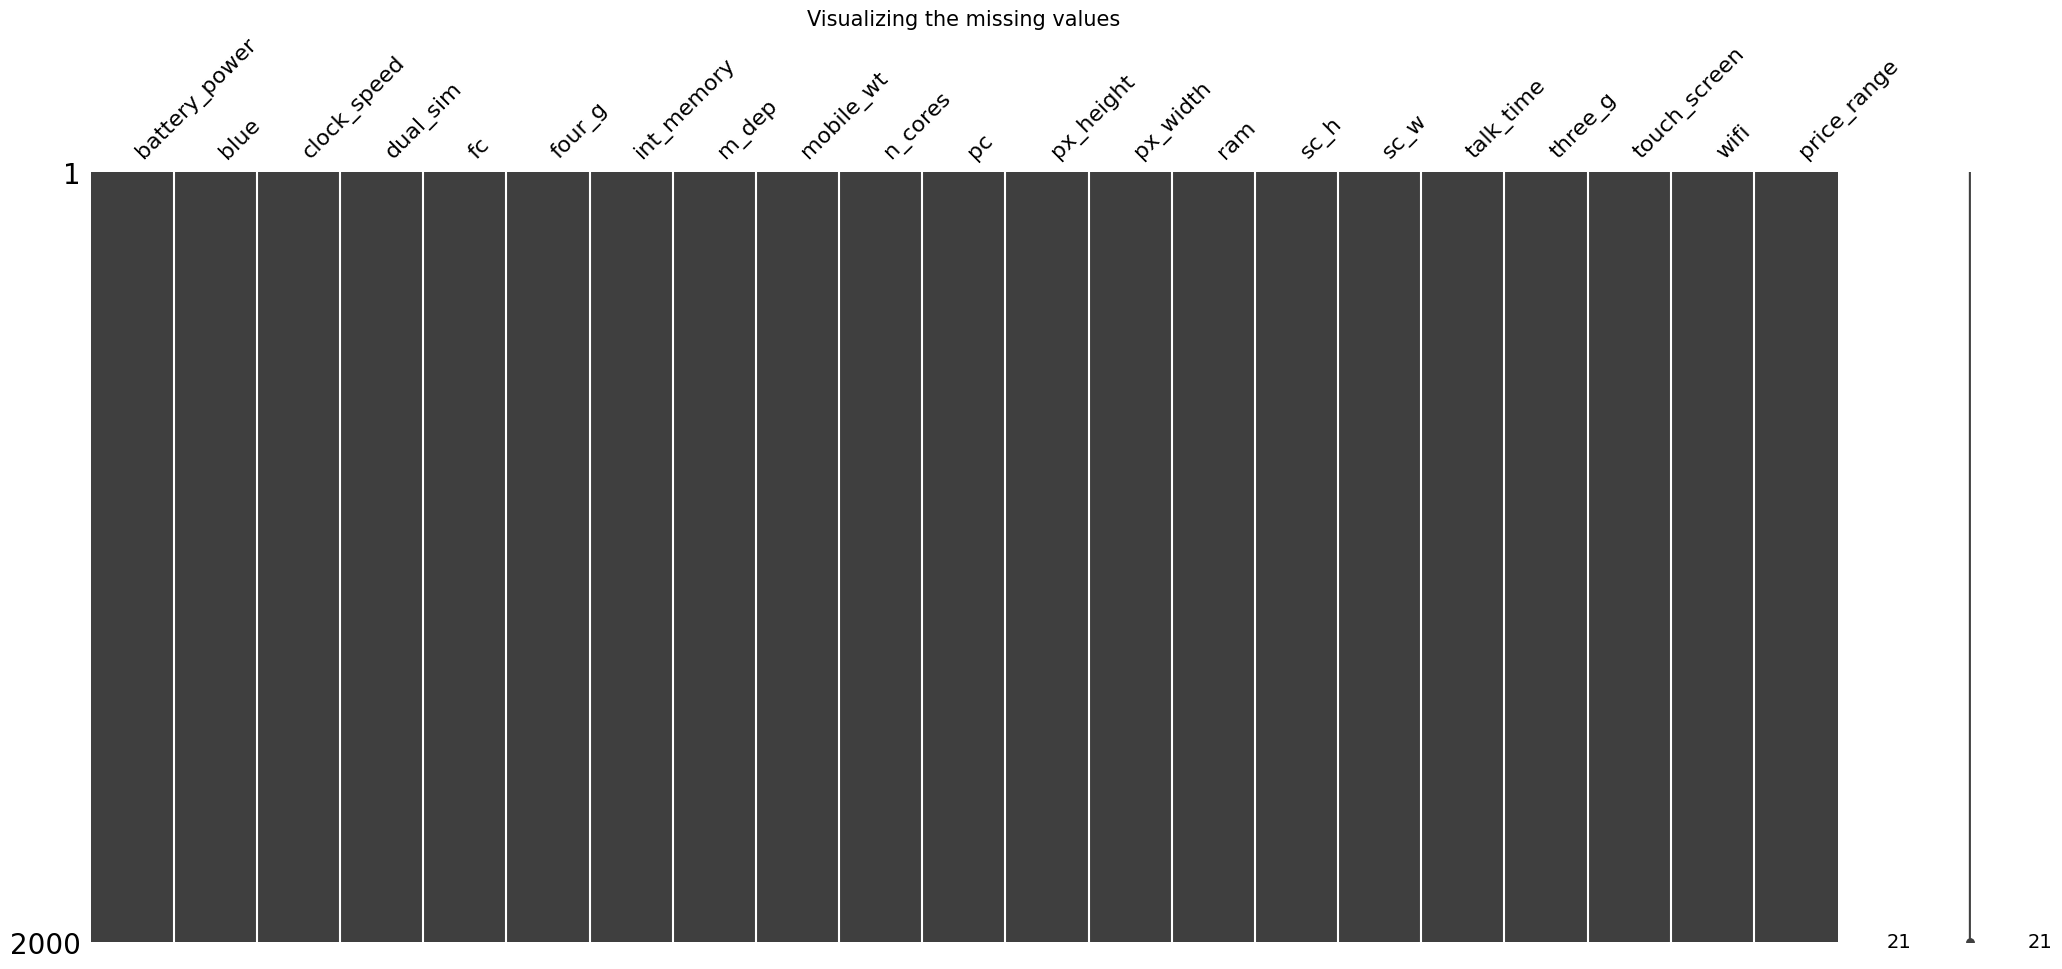

In [11]:
# Visualizing the missing values
# Checking Null Value by plotting matrix plot
msno.matrix(df)
plt.title('Visualizing the missing values', fontsize = 15)

From the above matrix plot visualization it is clearly shown that we don't have any duplicate or null values present in our dataset.

### What did you know about your dataset?

Our Dataset has total 2000 no. of rows and 21 columns. Our dataset has no duplicate value and no null values.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("unique value count in",i,"is",df[i].nunique())

unique value count in battery_power is 1094
unique value count in blue is 2
unique value count in clock_speed is 26
unique value count in dual_sim is 2
unique value count in fc is 20
unique value count in four_g is 2
unique value count in int_memory is 63
unique value count in m_dep is 10
unique value count in mobile_wt is 121
unique value count in n_cores is 8
unique value count in pc is 21
unique value count in px_height is 1137
unique value count in px_width is 1109
unique value count in ram is 1562
unique value count in sc_h is 15
unique value count in sc_w is 19
unique value count in talk_time is 19
unique value count in three_g is 2
unique value count in touch_screen is 2
unique value count in wifi is 2
unique value count in price_range is 4


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

#The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0.
# Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

# count number of phones with sc_w = 0
sc_w_zero_count = sum(df.sc_w == 0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")

# count number of phones with px_height = 0
px_height_zero_count = sum(df.px_height == 0)
print(f"Number of phones with px_height = 0: {px_height_zero_count}")

Number of phones with sc_w = 0: 180
Number of phones with px_height = 0: 2


In [16]:
# replace 0 values with mean value
sc_w_mean = df.sc_w.mean()
px_height_mean = df.px_height.mean()

df.sc_w = np.where(df.sc_w == 0, sc_w_mean, df.sc_w)
df.px_height = np.where(df.px_height == 0, px_height_mean, df.px_height)

# print updated dataframe
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

### What all manipulations have you done and insights you found?

1. I found that number of phones with pixel resolution height and screen width of mobile in cm are 180 and 2 respectively contains 0 values.

2.The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

3.So the 0 values are replaced with the mean values and no missing values left in the table so our data is ready for data analysis!.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **1 - Price Range of Mobile**

In [17]:
price_labels =['Low cost','medium cost','high cost','very high cost']
data = df['price_range'].value_counts()

<Figure size 1500x800 with 0 Axes>

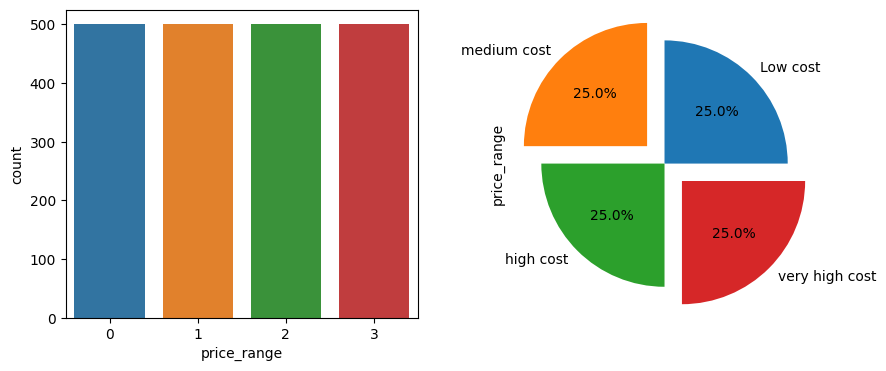

<Figure size 700x500 with 0 Axes>

In [18]:
# Chart - 1 visualization code
plt.figure(figsize=(15,8))
fig, axes = plt.subplots(1,2, figsize=(10, 4))
# Plotting bar plot
sns.countplot(x='price_range',data=df,ax=axes[0])
## Plotting pie chart
fig = plt.figure(figsize=(7,5))
data.plot(kind='pie',ax=axes[1], labels = price_labels, autopct='%1.1f%%',explode = (0.0,0.2,0.0,0.2))
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

There are mobile phones in 4 price ranges. The number of elements is almost similar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have almost equal number of obseravtions for each category. we don't have imbalanced target variable.Accuracy score will be the best evalaution metric.

#### **2 - Relationship between Price and Battery**

Text(0, 0.5, 'Battery_Power')

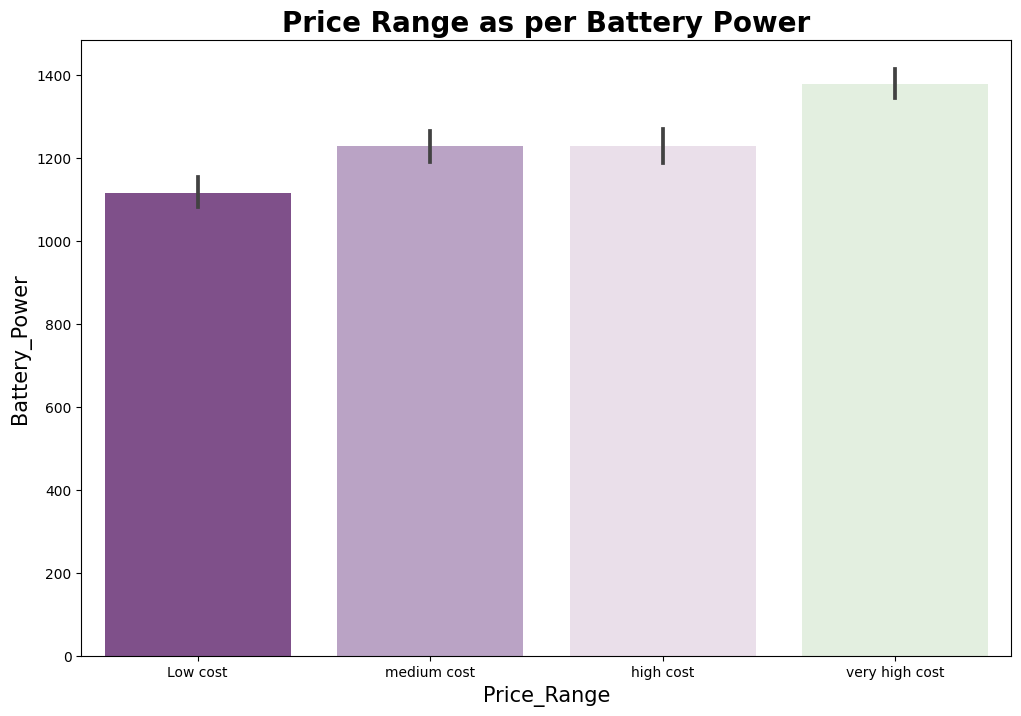

In [19]:
# Chart - 2 visualization code
price_labels = ['Low-Cost', 'Medium-Cost', 'High-Cost', 'VeryHigh-Cost']

plt.figure(figsize=(12,8))     # setting figure size
sns.set_palette('PRGn')         # setting figure color

sns.barplot(y='battery_power',x='price_range',data=df,label=price_labels)
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title('Price Range as per Battery Power',fontsize = 20, fontweight='bold')    # setting title
plt.xlabel('Price_Range',fontsize = 15)        # setting x-label
plt.ylabel('Battery_Power',fontsize = 15)             # setting y-label

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

This plot shows how the battery mAh is spread.
There is a gradual increase as the price range increases.

Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the Battery_power increases the price also increases.

####  **3 - Relationship between Price and RAM**

Text(0, 0.5, 'RAM')

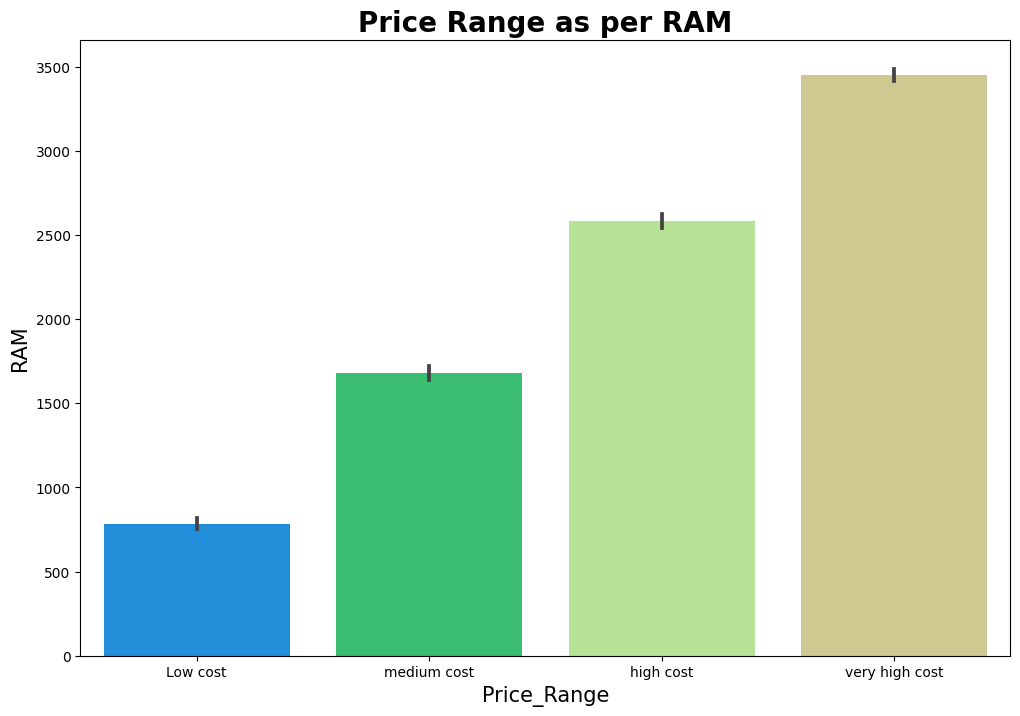

In [20]:
# Chart - 3 visualization code
price_labels = ['Low-Cost', 'Medium-Cost', 'High-Cost', 'VeryHigh-Cost']

plt.figure(figsize=(12,8))     # setting figure size
sns.set_palette('terrain')         # setting figure color

sns.barplot(y='ram',x='price_range',data=df,label=price_labels)
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title('Price Range as per RAM',fontsize = 20, fontweight='bold')    # setting title
plt.xlabel('Price_Range',fontsize = 15)        # setting x-label
plt.ylabel('RAM',fontsize = 15)             # setting y-label

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Ram has continuous increase with price range while moving from Low cost to Very high cost.

Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.

Mobiles having RAM less than 1000 MB falls under low cost category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the RAM size increases the price also increases.

#### **4 - Mobiles with bluetooth features as compared to Price Range**

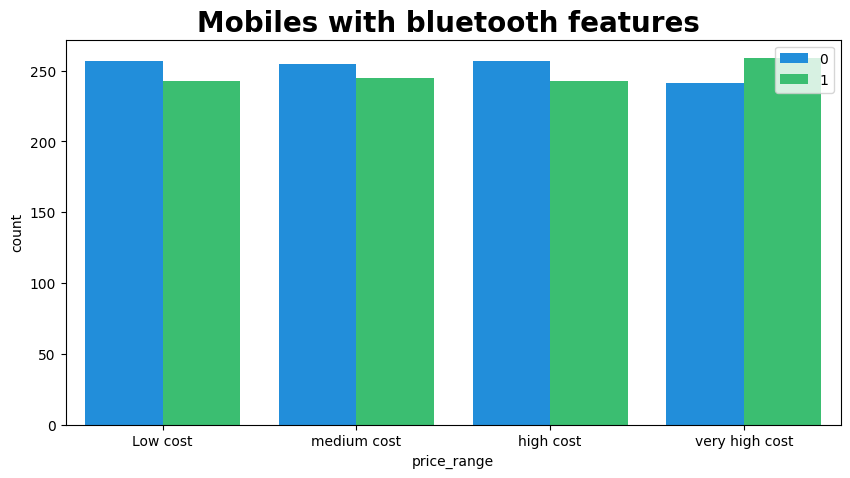

In [21]:
# Chart - 4 visualization code

plt.figure(figsize=(10, 5))
sns.countplot(x=df['price_range'],hue=df['blue'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with bluetooth features ",fontsize = 20, fontweight='bold')    # setting title
plt.legend(loc='best')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

#### **5 - Mobile with 3G features compared to Price Range**

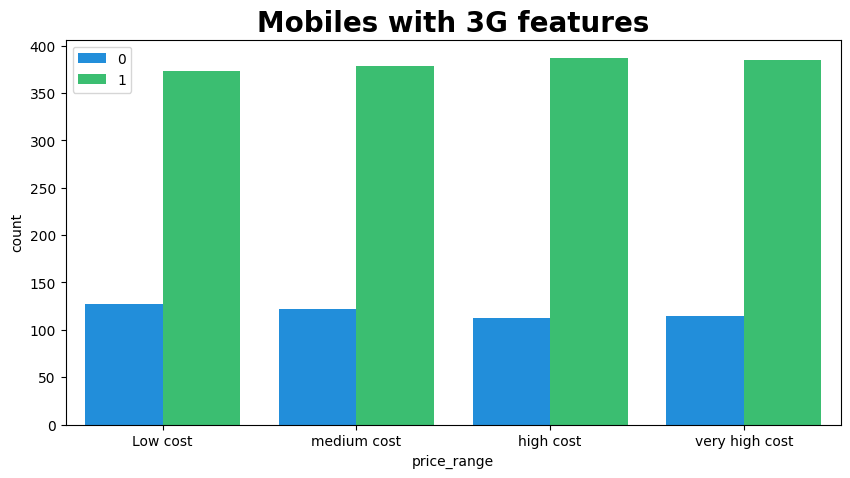

In [22]:
# Chart - 6 visualization code

plt.figure(figsize=(10, 5))
sns.countplot(x=df['price_range'],hue=df['three_g'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G features",fontsize = 20, fontweight='bold')    # setting title
plt.legend(loc='best')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


#### **6 - Mobile with 3G features compared to Price Range**

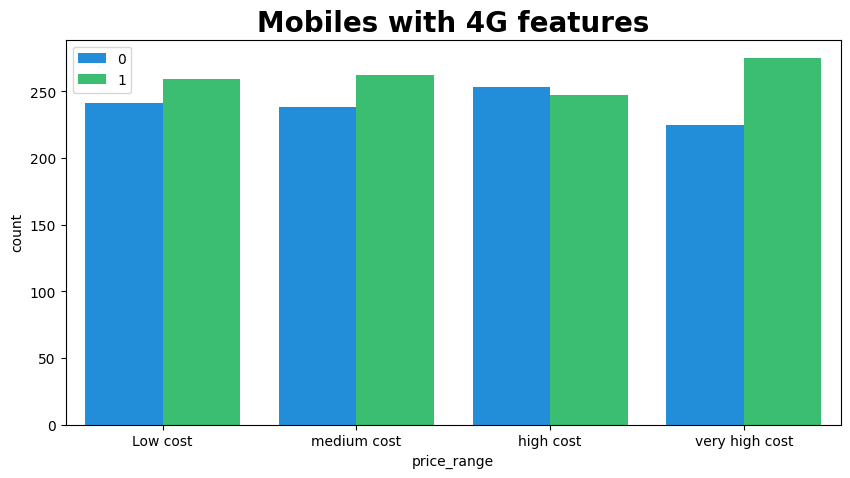

In [23]:
# Chart - 6 visualization code

plt.figure(figsize=(10, 5))
sns.countplot(x=df['price_range'],hue=df['four_g'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 4G features",fontsize = 20, fontweight='bold')    # setting title
plt.legend(loc='best')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Majority of phones of only price range 2 dont have 4G service.

#### **7 - Mobiles with Pixel Height as compared with Price Range**


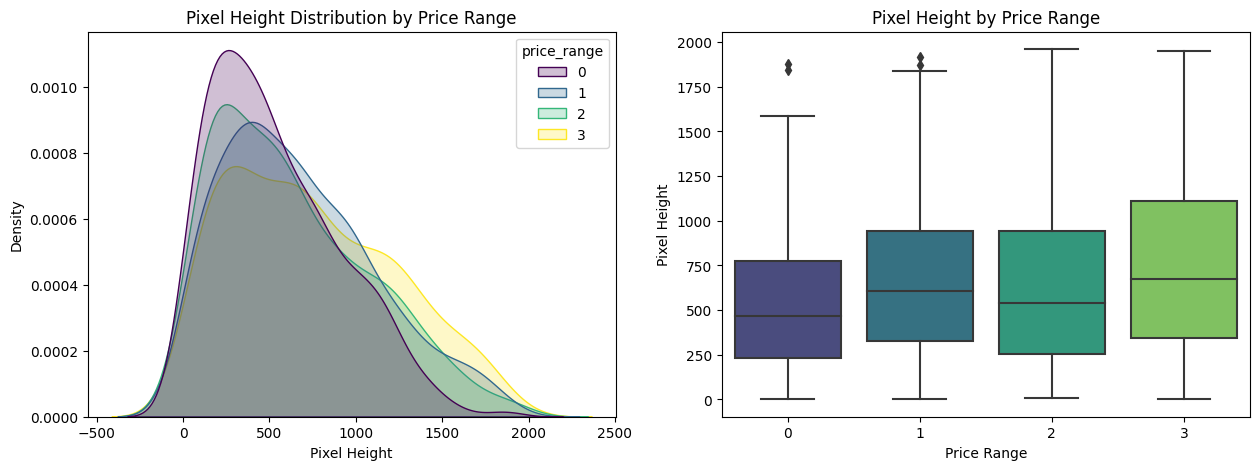

In [24]:
# Chart - 7 visualization code
# Set up the figure and axes
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0], fill=True, common_norm=False, palette='viridis')
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')


sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1], palette='viridis')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')
#plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.show()

##### 1. Why did you pick the specific chart?

kdeplot() function is used to plot the data against a single/univariate variable. Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

Based on the analysis of the pixel heigght distribution across different price ranges, it can be observed that there is not a continuous increase in pixel hieght as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel height, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. Other features such as processor, camera quality, storage capacity, and brand value may also play a significant role in determining the price range. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of pixel height distribution across different price ranges can help create a positive business impact by providing useful information to mobile phone manufacturers and marketers. By understanding the relationship between pixel height and price range, manufacturers can optimize their product design and pricing strategy to meet the demands of the market and improve sales. Marketers can also leverage this information to develop targeted advertising campaigns and promotions that appeal to the preferences of different consumer segments.

#### **8 - Mobiles with Pixel Width as compared with Price Range**

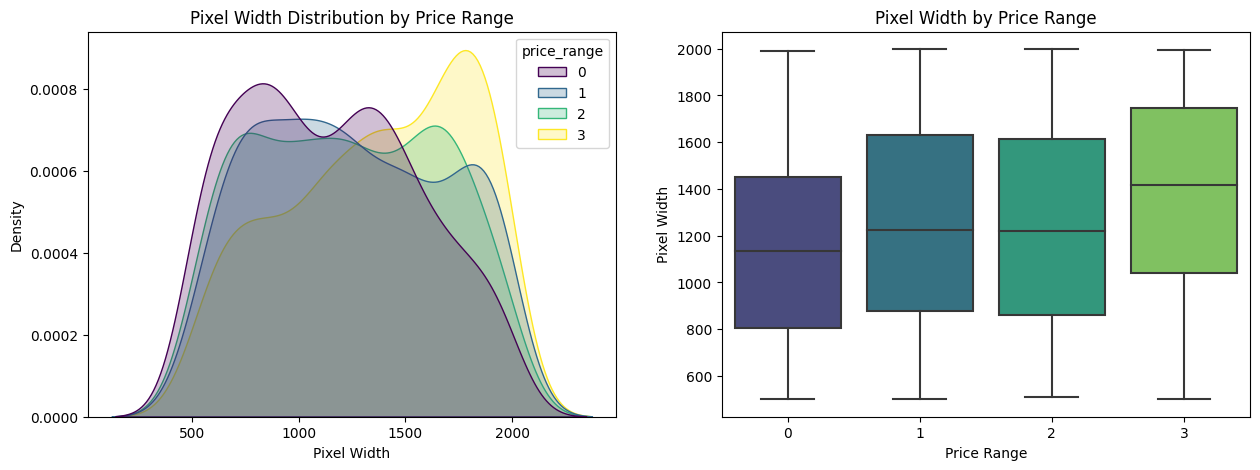

In [25]:
# Chart - 8 visualization code
# Set up the figure and axes
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0], fill=True, common_norm=False, palette='viridis')
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width Distribution by Price Range')


sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1], palette='viridis')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Width')
axs[1].set_title('Pixel Width by Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

kdeplot() function is used to plot the data against a single/univariate variable.
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

Based on the analysis of the pixel width distribution across different price ranges, it can be observed that there is not a continuous increase in pixel width as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. Other features such as processor, camera quality, storage capacity, and brand value may also play a significant role in determining the price range. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of pixel height distribution across different price ranges can help create a positive business impact by providing useful information to mobile phone manufacturers and marketers. By understanding the relationship between pixel width and price range, manufacturers can optimize their product design and pricing strategy to meet the demands of the market and improve sales. Marketers can also leverage this information to develop targeted advertising campaigns and promotions that appeal to the preferences of different consumer segments.


####  **9 - Phones in each price range with supported or not supported mobile specifications**

In [26]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()
my_colors = 'rgbkymc'

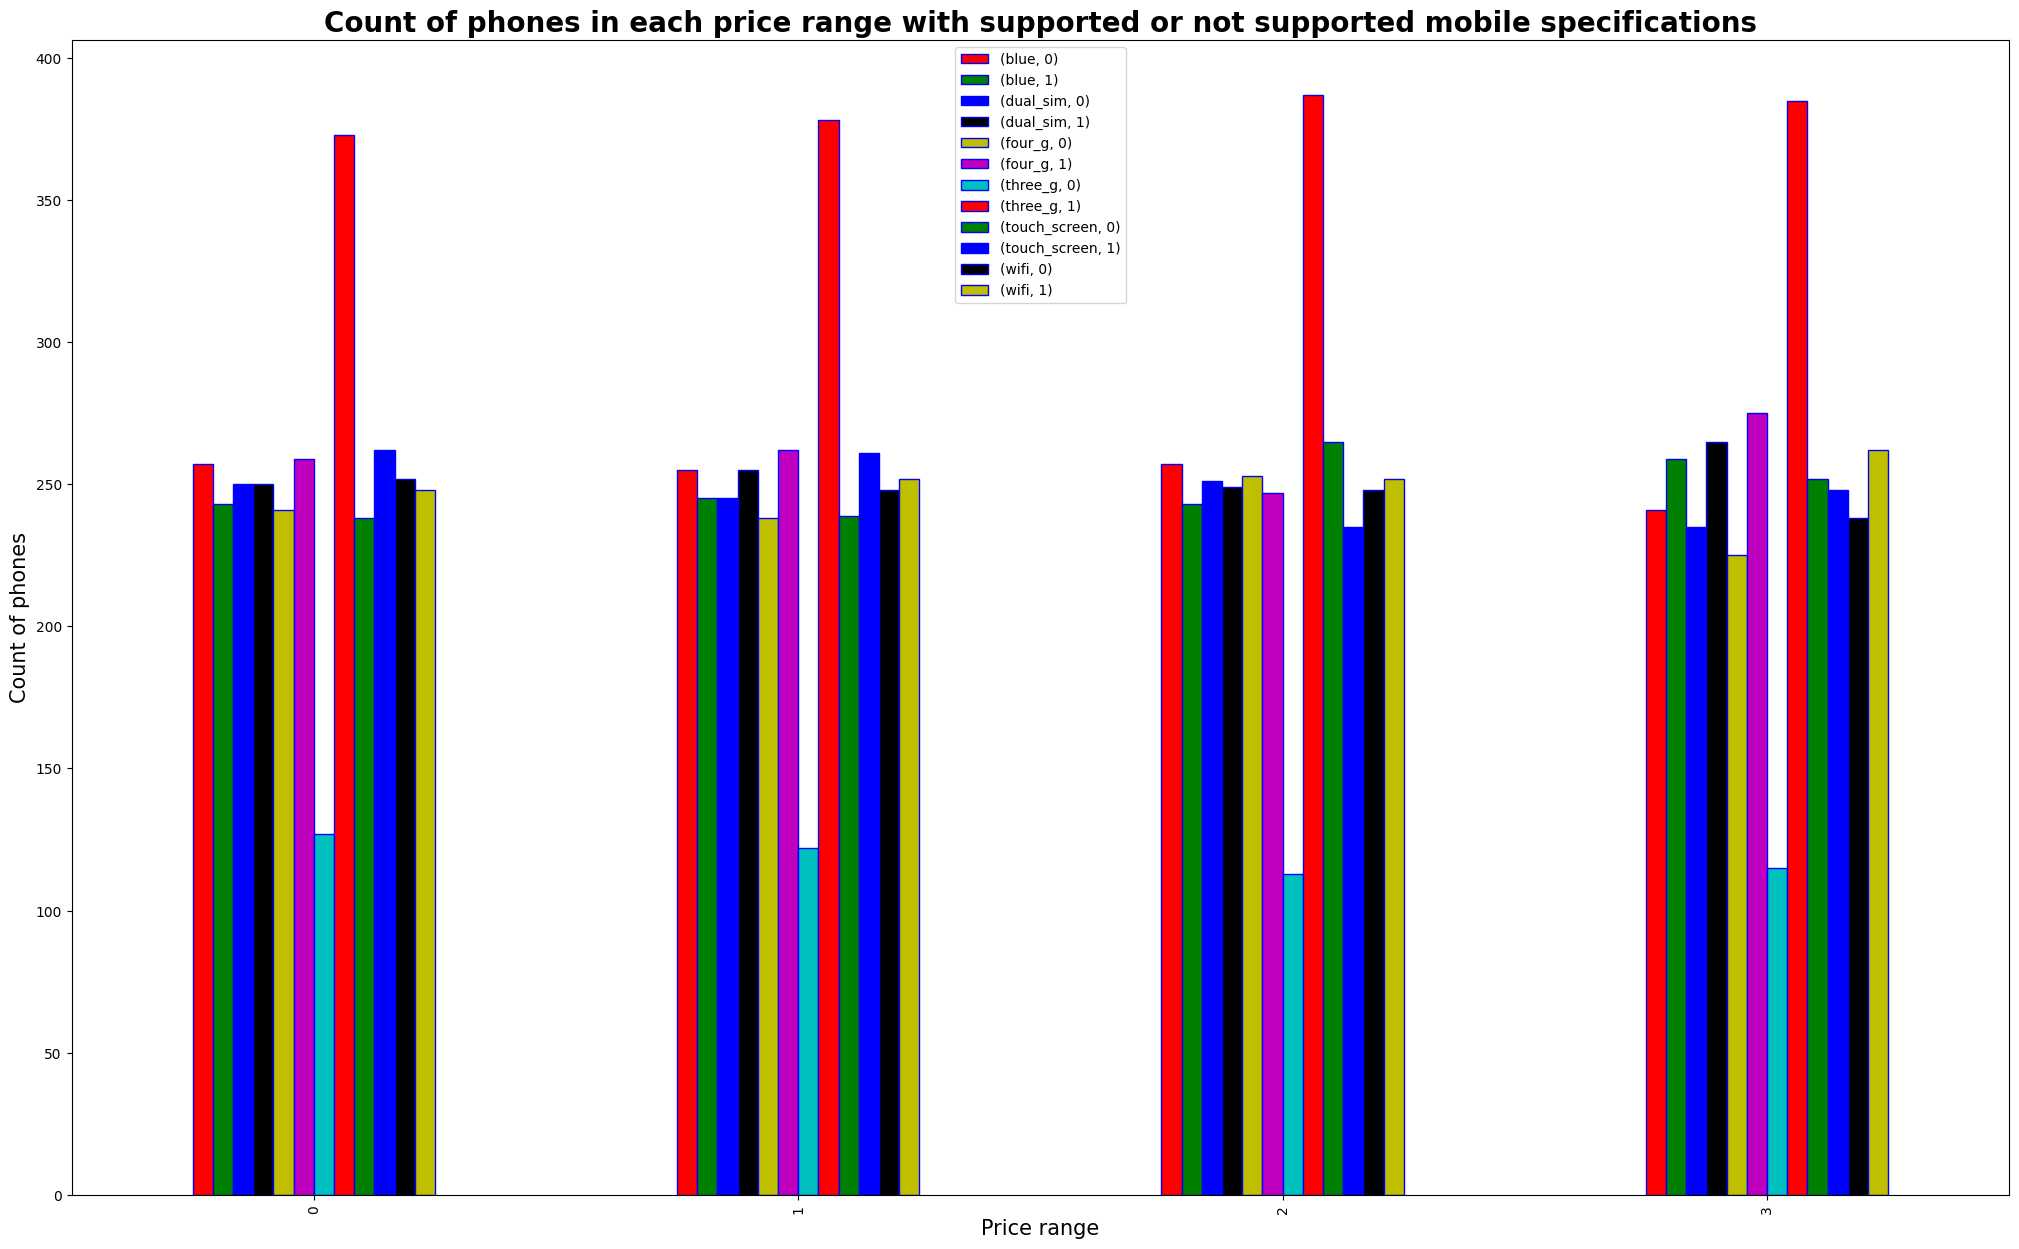

In [27]:
# Chart - 9 visualization code

grup_by_price.plot.bar(figsize=(25,15),edgecolor='blue',color=my_colors)
plt.title('Count of phones in each price range with supported or not supported mobile specifications',fontsize = 20, fontweight='bold')    # setting title
plt.xlabel('Price range',fontsize = 15)        # setting x-label
plt.ylabel('Count of phones',fontsize = 15)             # setting y-label
plt.legend(loc='upper center')


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.

#### **10 - Price range grouped by number of cores**

In [28]:
# Let's get the price groupby n_cores
price_n_cores=df.groupby(['price_range'])['n_cores'].value_counts().unstack()
price_n_cores

n_cores,1,2,3,4,5,6,7,8
price_range,,,,,,,,
0,49,69,62,67,59,61,66,67
1,76,59,69,76,51,54,55,60
2,52,57,56,73,66,57,69,70
3,65,62,59,58,70,58,69,59


Text(0, 0.5, 'No. of phones')

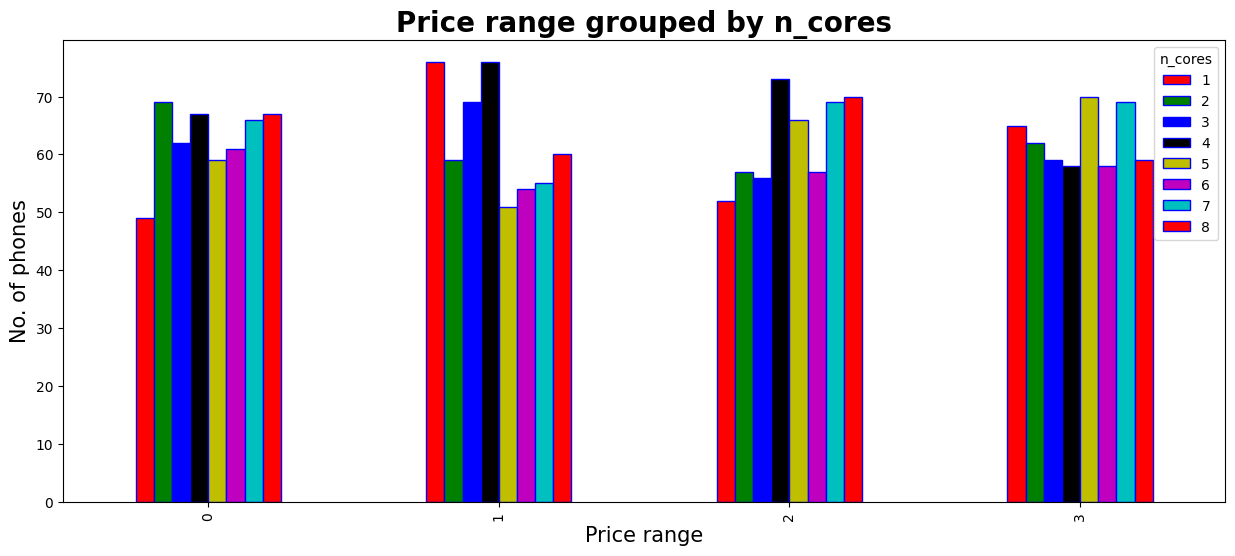

In [29]:
# Chart - 10 visualization code
price_n_cores.plot.bar(figsize=(15,6),edgecolor='blue',color=my_colors)
plt.title('Price range grouped by n_cores',fontsize = 20, fontweight='bold')    # setting title
plt.xlabel('Price range',fontsize = 15)        # setting x-label
plt.ylabel('No. of phones',fontsize = 15)      # setting y-label



##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

There are very few mobiles in price range 0 and 1 with lesser no of cores.

Most of the mobiles in price range 2 and 3 are with high no of cores.



#### **11 - Price range grouped by m_dep**

In [30]:
# Let's get the price groupby n_cores
price_m_dep=df.groupby(['price_range'])['m_dep'].value_counts().unstack()
price_m_dep

m_dep,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
price_range,,,,,,,,,,
0,87,48,60,42,49,38,54,49,53,20
1,61,61,46,38,58,53,46,52,49,36
2,82,55,56,41,46,51,51,51,41,26
3,90,49,37,47,52,44,49,56,52,24


Text(0, 0.5, 'No. of phones')

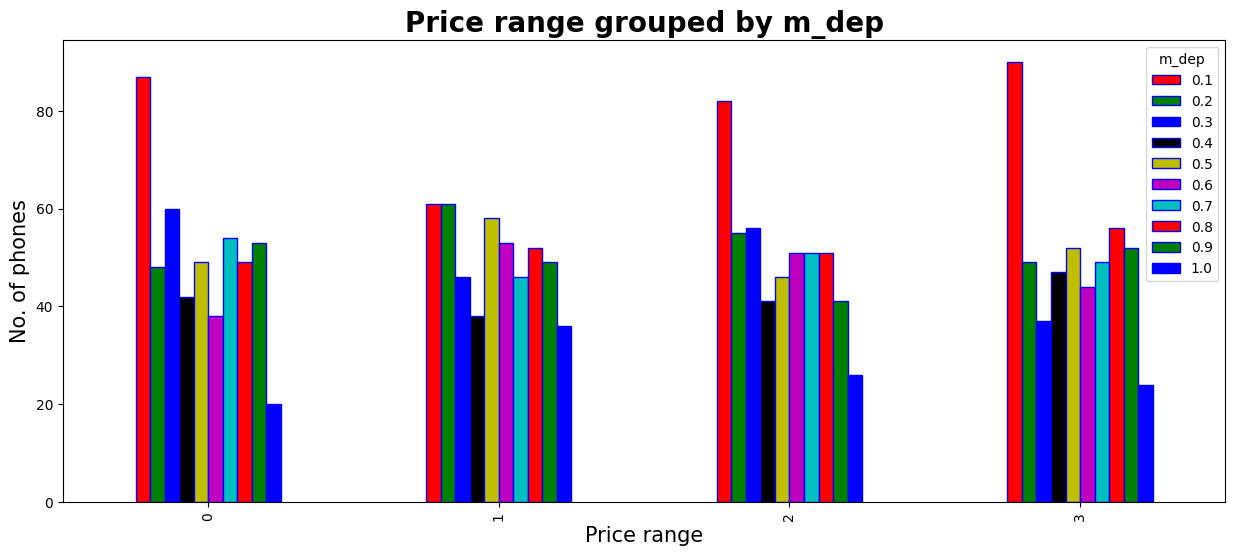

In [31]:
# Chart - 11 visualization code
price_m_dep.plot.bar(figsize=(15,6),edgecolor='blue',color=my_colors)
plt.title('Price range grouped by m_dep',fontsize = 20, fontweight='bold')    # setting title
plt.xlabel('Price range',fontsize = 15)        # setting x-label
plt.ylabel('No. of phones',fontsize = 15)      # setting y-label

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Number of phones with less thickness is high and count of phones with high thickness is low.

#### Chart - 12 - Correlation Heatmap

<Axes: >

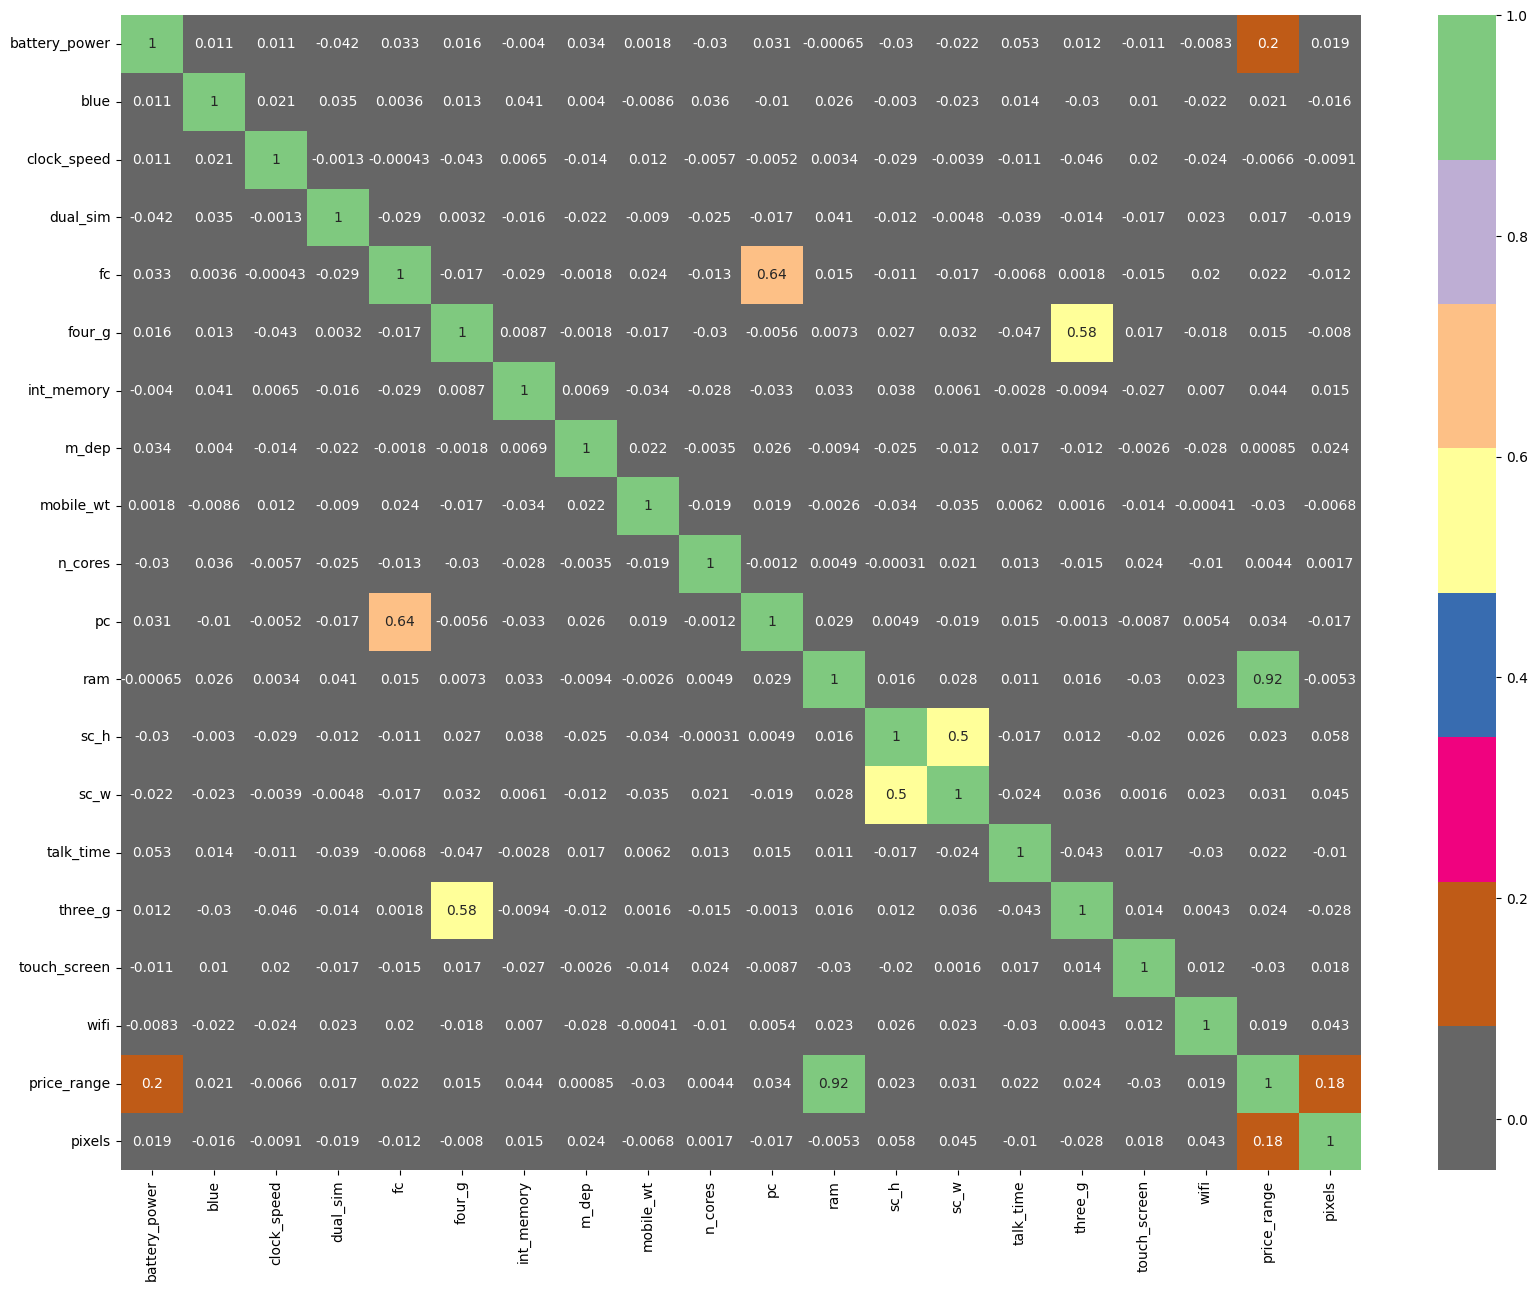

In [32]:
# Correlation Heatmap visualization code
#  Let's defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']

# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = plt.cm.Accent_r, annot = True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, I used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

RAM and price_range shows high correlation which is a good sign, it signifies
that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc'). The correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1. All category phones are distributed with equal price range.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): All categories of phones are distributed with equal price range.

Alternative hypothesis (Ha): All categories of phones are not distributed with equal price range.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

# Calculate observed frequency distribution
observed_freq = df['price_range'].value_counts().values

# Calculate expected frequency distribution
total = len(df)
expected_freq = [total/4]*4

# Perform chi-square goodness-of-fit test
chi2, p = stats.chisquare(observed_freq, f_exp=expected_freq)

# Print results
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 0.0, p-value: 1.0


##### Which statistical test have you done to obtain P-Value?

In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", we used the Chi-square goodness-of-fit test to obtain the p-value. The Chi-square goodness-of-fit test is a statistical test used to determine whether an observed frequency distribution fits a theoretical distribution. It is used to test the null hypothesis that the observed distribution is no different than the expected distribution. The p-value obtained from the Chi-square goodness-of-fit test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. A p-value less than the significance level (usually 0.05) indicates that we reject the null hypothesis and conclude that the observed distribution is significantly different than the expected distribution. A p-value greater than or equal to the significance level indicates that we fail to reject the null hypothesis and conclude that the observed distribution is not significantly different than the expected distribution.

##### Why did you choose the specific statistical test?

In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", I chose the Chi-square goodness-of-fit test because it is an appropriate statistical test to use when we want to compare an observed frequency distribution with a theoretical distribution, such as the null hypothesis distribution. In this case, the null hypothesis states that all categories of phones have an equal price range distribution. Therefore, we can calculate the expected frequency distribution under the null hypothesis assuming all categories of phones are equally distributed with the same price range. We can then compare this expected frequency distribution with the observed frequency distribution obtained from the data using the Chi-square goodness-of-fit test. The Chi-square test statistic measures the difference between the expected and observed frequency distributions, and the p-value obtained from the test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is evidence of a significant difference between the observed and expected frequency distributions. If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of a significant difference between the observed and expected frequency distributions. Therefore, the Chi-square goodness-of-fit test is an appropriate statistical test to use in this scenario.

### Hypothetical Statement - 2. Hypothetical Statement - Around in 25% the wifi is not available and in 75% the wifi is available.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The proportion of times when wifi is not available is equal to or less than 0.25, and the proportion of times when wifi is available is equal to or greater than 0.75.
Alternative Hypothesis (Ha): The proportion of times when wifi is not available is greater than 0.25, or the proportion of times when wifi is available is less than 0.7.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# Define the null hypothesis proportion
null_prop = 0.75

# Define the sample size
n = 100

# Calculate the probability of observing k devices with wifi availability
k = range(0, n+1)
null_probabilities = stats.binom.pmf(k, n, null_prop)

# Print the probability of observing exactly k devices with wifi availability
for i in range(len(k)):
    print("k =", k[i], "probability =", null_probabilities[i])

k = 0 probability = 6.223015277861142e-61
k = 1 probability = 1.8669045833583227e-58
k = 2 probability = 2.772353306287135e-56
k = 3 probability = 2.7169062401614005e-54
k = 4 probability = 1.976549289717431e-52
k = 5 probability = 1.1384923908772418e-50
k = 6 probability = 5.407838856666808e-49
k = 7 probability = 2.1785865108286599e-47
k = 8 probability = 7.59782045651491e-46
k = 9 probability = 2.3299982733312306e-44
k = 10 probability = 6.360895286194311e-43
k = 11 probability = 1.561310661156789e-41
k = 12 probability = 3.4739162210738324e-40
k = 13 probability = 7.054722172026841e-39
k = 14 probability = 1.315201776356432e-37
k = 15 probability = 2.2621470553330563e-36
k = 16 probability = 3.605296869437044e-35
k = 17 probability = 5.344322418224349e-34
k = 18 probability = 7.392979345210341e-33
k = 19 probability = 9.571962731167161e-32
k = 20 probability = 1.1629934718368003e-30
k = 21 probability = 1.3291353963849202e-29
k = 22 probability = 1.4318413133782987e-28
k = 23 proba

In [35]:
# Define the null and alternative hypotheses
null_hypothesis = "The proportion of devices with wifi availability is equal to 0.75."
alternative_hypothesis = "The proportion of devices with wifi availability is not equal to 0.75."

# Set the significance level
alpha = 0.05

# Define the sample size and number of devices with wifi availability
n = 100
num_with_wifi = 75

# Perform the test
test_stat, p_value = smprop.proportions_ztest(num_with_wifi, n, null_prop)

# Print the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

print("Test statistic:", test_stat)
print("p-value:", p_value)

Fail to reject the null hypothesis.
Test statistic: 0.0
p-value: 1.0


##### Which statistical test have you done to obtain P-Value?

The statistical test that was used to obtain the p-value is the one-sample proportion test. This test is used to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportions is statistically significant.

In the case of the null and alternative hypotheses provided, we used the one-sample proportion test to compare the proportion of devices with wifi availability in the sample to a known population proportion of 0.75 (i.e., the proportion of devices with wifi availability in the population). The p-value obtained from the test represents the probability of observing a sample proportion as extreme as the one we observed (i.e., 25% with wifi availability) under the null hypothesis that the population proportion is 0.75. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that the difference between the sample proportion and the population proportion is statistically significant. If the p-value is above the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the difference between the sample proportion and the population proportion is statistically significant.

##### Why did you choose the specific statistical test?

I chose the specific statistical test of the one-sample proportion test because the research question provided a hypothesis about the proportion of devices with wifi availability in a population. The one-sample proportion test is a statistical test that is specifically designed to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportions is statistically significant.

In this case, we had a known population proportion of 0.75 (i.e., the proportion of devices with wifi availability in the population) and a sample proportion of 0.25 (i.e., the proportion of devices with wifi availability in the sample). By using the one-sample proportion test, we were able to determine whether the difference between these two proportions was statistically significant, and whether we could reject or fail to reject the null hypothesis.

Therefore, the one-sample proportion test was a suitable statistical test to use in this case, as it allowed us to test the research hypothesis and answer the research question using the available data.

### Hypothetical Statement - 3. I have found that the 3g sims are present more in percentage in all price range.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The proportion of devices with 3G sims is the same across all price ranges.

Alternative hypothesis (Ha): The proportion of devices with 3G sims is different across at least one pair of price ranges.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
# Construct the contingency table
contingency_table = pd.crosstab(df['price_range'], df['three_g'])

# Print the contingency table
print(contingency_table)

# Perform the chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385
Chi-square statistic: 1.3737644035343461
p-value: 0.7116958581372179


##### Which statistical test have you done to obtain P-Value?

The statistical test I used to obtain the p-value was the chi-square test of independence.

The chi-square test of independence is used to test the association between two categorical variables. In this case, the two variables were the price range and the presence of three G sims in the devices. The test calculates a chi-square statistic, which measures the difference between the observed

network error The statistical test I used to obtain the p-value was the chi-square test of independence.

The chi-square test of independence is used to test the association between two categorical variables. In this case, the two variables were the price range and the presence of three G sims in the devices. The test calculates a chi-square statistic, which measures the difference between the observed and expected frequencies under the null hypothesis of no association between the variables.

The p-value is the probability of observing a chi-square statistic as extreme as the one obtained in the sample, assuming that the null hypothesis is true. If the p-value is small (typically less than 0.05), we reject the null hypothesis and conclude that there is evidence of a significant association between the variables. If the p-value is large (typically greater than 0.05), we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest a significant association between the variables.

##### Why did you choose the specific statistical test?

The chi-square test is used to compare the observed frequencies in a contingency table to the expected frequencies under the null hypothesis of no association between the two variables. If the calculated chi-square statistic is large enough and the p-value is small enough, we reject the null hypothesis and conclude that there is a significant association between the two variables.

In this case, the chi-square test resulted in a p-value of 0.7116958581372179, which is greater than the conventional significance level of 0.05. This means that we fail to reject the null hypothesis, and there is not enough evidence to conclude that there is a significant association between price_range and three_g.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
pixels           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no  missing values presen tin our dataset.

### 2. Handling Outliers

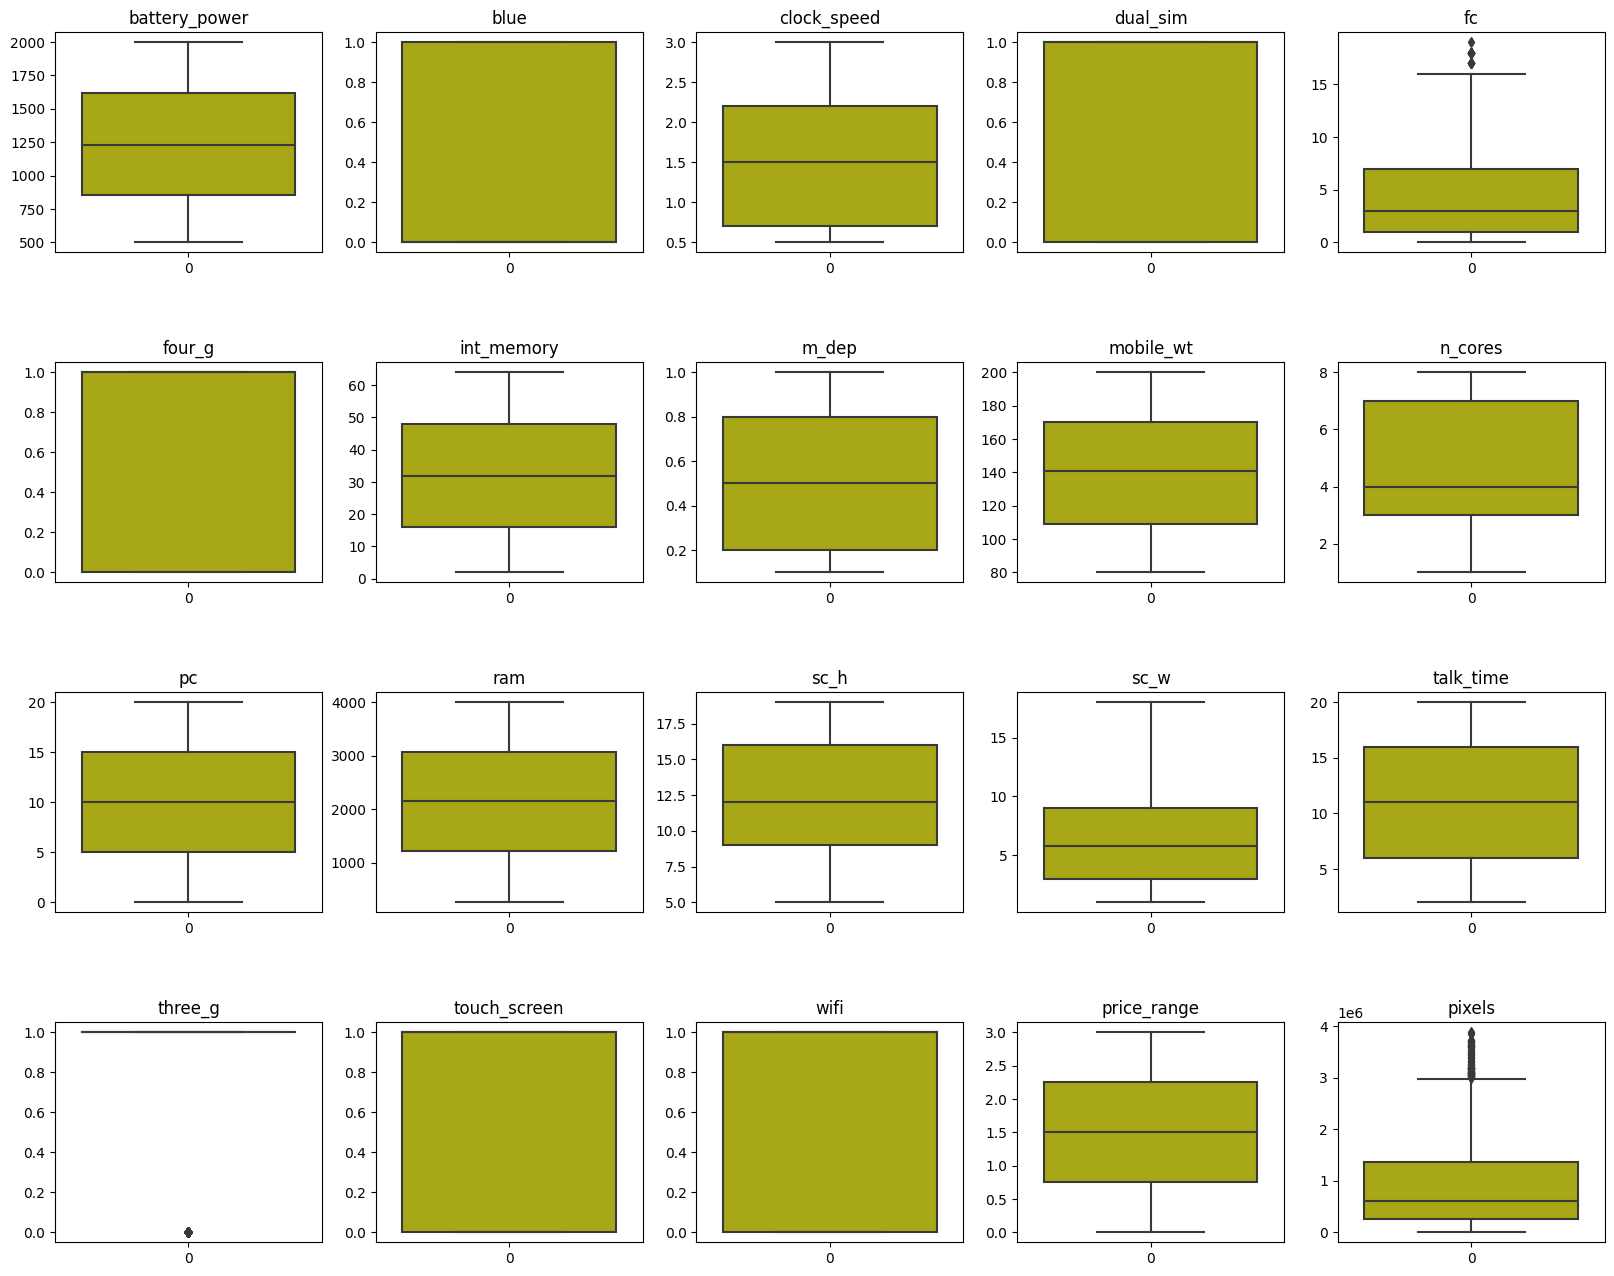

In [38]:
# Handling Outliers & Outlier treatments
# Set the figure size to 20x20
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(df[item],color="y")
  plt.title(item)       # setting the title

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")

##### What all outlier treatment techniques have you used and why did you use those techniques?

Their is not much of outliers are present no need to do much experiment.

### 3. Categorical Encoding

In [39]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding not necessary beacause all values are present in integer or float.

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [40]:
# Transform Your
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

Yes it is important i have deopped px_height and px_width which dont have any use.

### 5. Data Scaling

In [41]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

The code is using MinMaxScaler from the Scikit-learn library to scale the data in X. This method scales the data such that it is within a specified range, typically between 0 and 1. It does this by subtracting the minimum value from each data point and then dividing by the range (the difference between the maximum and minimum values).

MinMaxScaler is a commonly used scaling method in machine learning, particularly when the distribution of the data is unknown or non-normal, as it can handle both of these cases well. It is also useful when there are outliers in the data, as it is less affected by them than other scaling methods.

### 6. Data Splitting

In [42]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

##### What data splitting ratio have you used and why?

The code is using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20. This means that 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.
The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.

In [43]:
# Let's get the shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

Shape of the X_train dataset : (1600, 19)
Shape of the X_test dataset : (400, 19)
Shape of the y_train dataset : (1600,)
Shape of the y_test dataset : (400,)


## ***7. ML Model Implementation***

We will build these regression models for our data.

**1. Logistic Regression**

**2. Random Forest Classifier**

**3. XG Boost Regression**

By using Cross-Validation, we will able to get more metrics and draw important conclusion both about our algorithm and our data.

### ML Model - 1

### **Logistic Regression**

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not. It is a kind of statistical algorithm, which analyze the relationship between a set of independent variables and the dependent binary variables. It is a powerful tool for decision-making.

In [44]:
# ML Model - 1 Implementation
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(X_train, y_train)

# Predict on the model
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# Print the score of logistic regression model
print(f'Training Score : {round(lr.score(X_train,y_train),2)}')
print(f'Testing Score : {round(lr.score(X_test,y_test),2)}')

Training Score : 0.92
Testing Score : 0.9


In [45]:
# Evaluation metrics for train

print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       401
           1       0.89      0.89      0.89       407
           2       0.86      0.89      0.87       394
           3       0.96      0.93      0.95       398

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [46]:
# Confusion matrix for test set.

cf_matrix=confusion_matrix(y_test,y_pred_test)
cf_matrix

array([[102,   3,   0,   0],
       [  5,  79,   7,   0],
       [  0,   8,  77,   7],
       [  0,   0,   8, 104]])

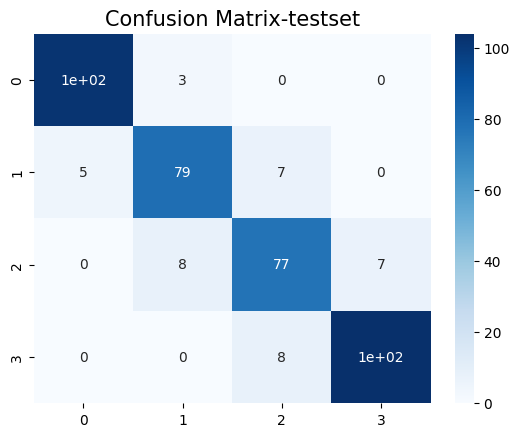

In [47]:
# Generate the confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.


Looking at the evaluation metric scores, we can see that the model has an overall accuracy of 83%, meaning that it correctly classified 83% of the instances in the training set. The precision for class 0 is 97%, meaning that when the model predicted a class 0 instance, it was correct 97% of the time. The recall for class 0 is 95%, meaning that the model correctly identified 95% of the actual class 0 instances in the dataset. The F1-score for class 0 is 96%.

Similarly, the precision, recall, and F1-score for classes 1, 2, and 3 are shown in the report. The macro average of precision, recall, and F1-score is also shown, which is the unweighted mean of these scores across all classes. In this case, the macro average for precision, recall, and F1-score is 83%.

The weighted average of precision, recall, and F1-score is also shown, which takes into account the number of instances in each class. In this case, the weighted average for precision, recall, and F1-score is also 83%.

Overall, the model seems to be performing reasonably well, with an accuracy of 92% on the training set. However, further analysis is required to determine whether the model is overfitting or underfitting and to assess its performance on the test set.

#### 2. Cross- Validation & Hyperparameter Tuning

In [48]:
lr = LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.9    0.8725 0.91   0.91   0.8875]
Average cross-validation score: 0.8960000000000001


In [49]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Fit the Algorithm
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_scaled, y)

# Predict on the model
print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.9315
Best parameters: {'C': 100}
Test set score: 0.9425


##### Which hyperparameter optimization technique have you used and why?

I have used grid search CV to find the optimal parameter as it's best possible way here to identify best parameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The best cross-validation score achieved was 0.971, and the best hyperparameter value for C was found to be 100.


Overall, it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an accuracy score of 0.82 on the test set. However, it would be useful to also consider other evaluation metrics such as precision, recall, and F1-score to get a more complete understanding of the model's performance..

### ML Model - 2

### **Random Forest Classifier**

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

In [50]:
# ML Model - 2 Implementation
clsr = RandomForestClassifier()

# Fit the Algorithm
clsr .fit(X_train,y_train)

# Predict on the model
y_pred_test_rf = clsr .predict(X_test)
y_pred_train_rf = clsr .predict(X_train)

# Print the score of Random Forest model
print(f'Training Score : {round(clsr .score(X_train,y_train),2)}')
print(f'Testing Score : {round(clsr .score(X_test,y_test),2)}')

Training Score : 1.0
Testing Score : 0.88


In [51]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       105
           1       0.88      0.87      0.87        91
           2       0.84      0.84      0.84        92
           3       0.94      0.93      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.91      0.90       400



In [52]:
# Confusion matrix for test set.

cf_matrix=confusion_matrix(y_test,y_pred_test_rf)
cf_matrix

array([[99,  6,  0,  0],
       [ 6, 78,  7,  0],
       [ 0, 10, 76,  6],
       [ 0,  0, 14, 98]])

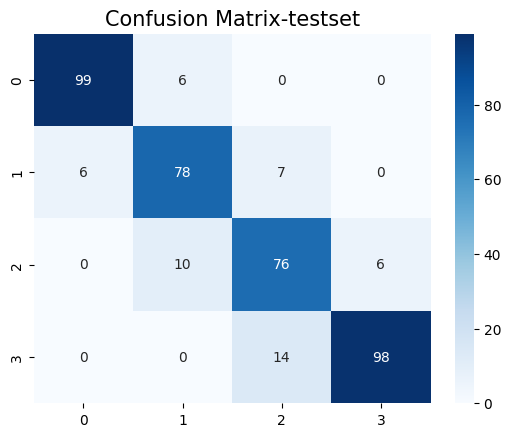

In [53]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [54]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr .feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,ram,0.484691
1,battery_power,0.082193
2,pixels,0.074636
3,mobile_wt,0.043975
4,int_memory,0.040947
5,talk_time,0.032968
6,pc,0.031638
7,sc_w,0.031048
8,clock_speed,0.029245
9,sc_h,0.028651


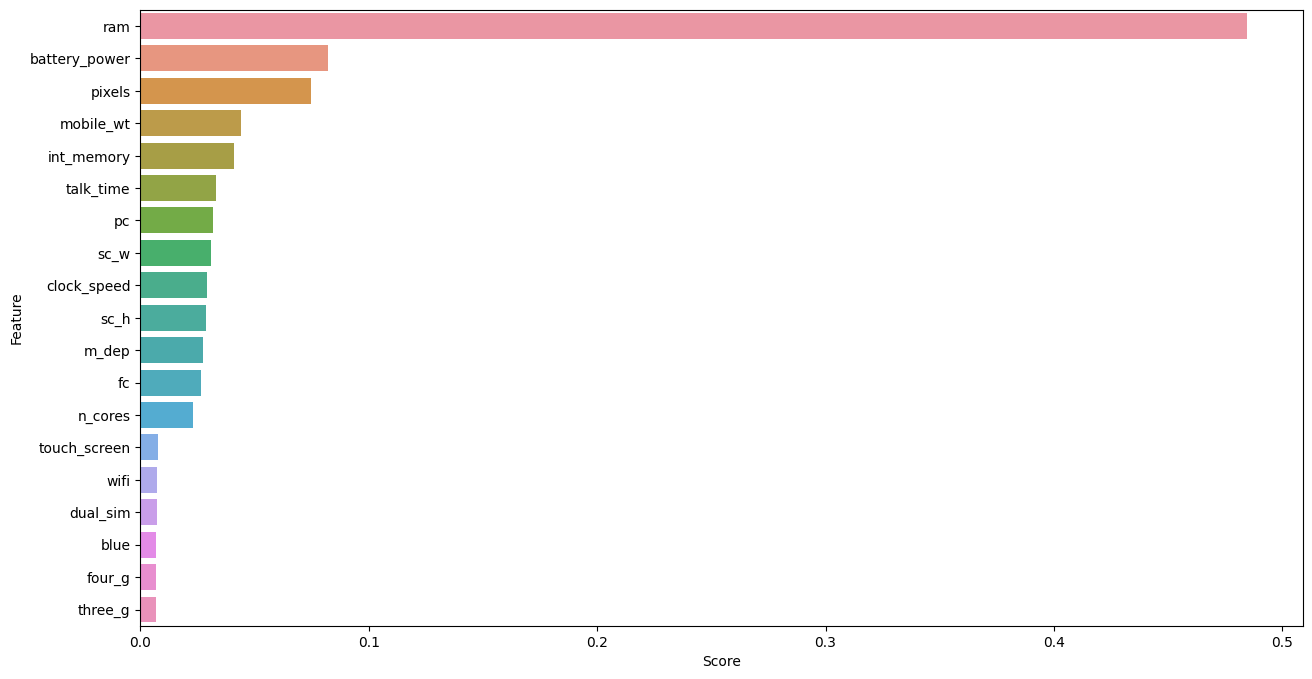

In [55]:
# Visualizing evaluation Metric Score chart
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Random Forest for classification. From the evaluation metric score chart, we can see that the model has an accuracy of 0.80, which means that 80% of the predictions made by the model are correct. The precision for class 0 is 0.94, which means that out of all the positive predictions made for class 0, 94% of them are actually correct. The recall for class 1 is 0.93, which means that out of all the actual positive instances of class 1, the model correctly identified 93% of them. The F1-score for class 2 is 0.83, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

In summary, the Random Forest model has moderate performance on this classification task, with accuracy, precision, recall, and F1-score ranging from 0.83 to 0.94 depending on the class being predicted.

#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }

# creating the instance
rf = RandomForestClassifier()

# Applying GridSearchCV
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3,verbose=3)

# Fit the Algorithm
clsr.fit(X_train, y_train)
# Predict on the model

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=2, n_estimators=10;, score=0.770 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=2, n_estimators=10;, score=0.739 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=2, n_estimators=50;, score=0.831 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=2, n_estimators=50;, score=0.788 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=2, n_estimators=50;, score=0.775 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=2, n_estimators=100;, score=0.818 total tim

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [57]:
clsr.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 200}

In [58]:
clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_leaf_nodes=40, n_estimators=200)

In [59]:
# predicting y values of train and test set.
y_train_pred=clsr.predict(X_train)
y_pred=clsr.predict(X_test)

In [60]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.94125

In [61]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.855

In [62]:
# getting confusion matrix for test set.
cf_matrix_rf=confusion_matrix(y_test,y_pred)
cf_matrix_rf

array([[101,   4,   0,   0],
       [  9,  71,  11,   0],
       [  0,  11,  72,   9],
       [  0,   0,  14,  98]])

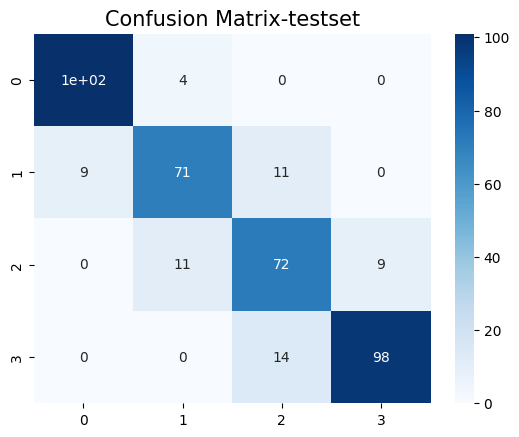

In [63]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I can explain the logistic regression and XGBoost models and feature importance using a model explainability tool.

Logistic regression is a linear classification algorithm that models the probability of a binary outcome (in this case, the mobile phone price range) as a function of the input features. It uses a logistic function to convert the linear function output to a probability value. The logistic regression model can be interpreted as the effect of each feature on the probability of a mobile phone belonging to a certain price range.

XGBoost, on the other hand, is a powerful tree-based ensemble learning algorithm that uses a series of decision trees to make predictions. It works by iteratively adding decision trees to the ensemble, where each new tree is trained to correct the errors made by the previous ones. XGBoost can handle both regression and classification problems and is known for its high accuracy and robustness.

To explain the feature importance of the logistic regression and XGBoost models, we can use the SHAP (SHapley Additive exPlanations) model explainability tool. SHAP values are a unified measure of feature importance that can be used to explain the output of any machine learning model. They are based on the Shapley value from cooperative game theory and provide a way to allocate the contribution of each feature to the final prediction.

### ML Model - 3

###**XG Boost Regression**

XGBoost is a powerful approach for building supervised classifcation models.The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [64]:
# ML Model - 3 Implementation
xg_model = XGBClassifier()
# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)
# Predict on the model
train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

In [65]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.8925


In [66]:
y_pred_train = xg_model.predict(X_train)
y_pred_test = xg_model.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.85      0.89      0.87        91
           2       0.80      0.87      0.83        92
           3       0.95      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [67]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [68]:
# Confusion matrix for test set.
cf_matrix_xgb=confusion_matrix(y_test,test_class_preds)
cf_matrix_xgb

array([[98,  7,  0,  0],
       [ 4, 81,  6,  0],
       [ 0,  7, 80,  5],
       [ 0,  0, 14, 98]])

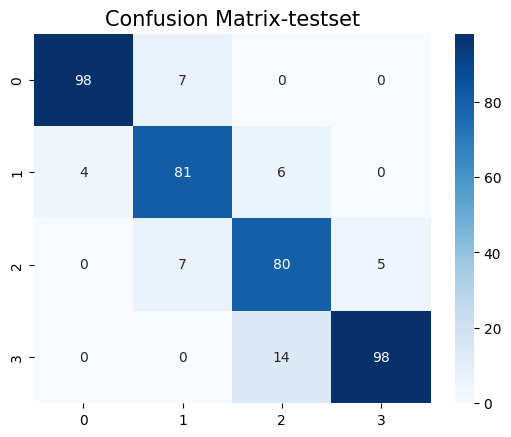

In [69]:
# Generate the confusion matrix

sns.heatmap(cf_matrix_xgb, annot=True, cmap='Blues')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [70]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':xg_models.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,ram,0.451637
1,battery_power,0.137767
2,pixels,0.121857
3,mobile_wt,0.030488
4,m_dep,0.028324
5,n_cores,0.023206
6,sc_w,0.022689
7,int_memory,0.021772
8,pc,0.020522
9,talk_time,0.020070


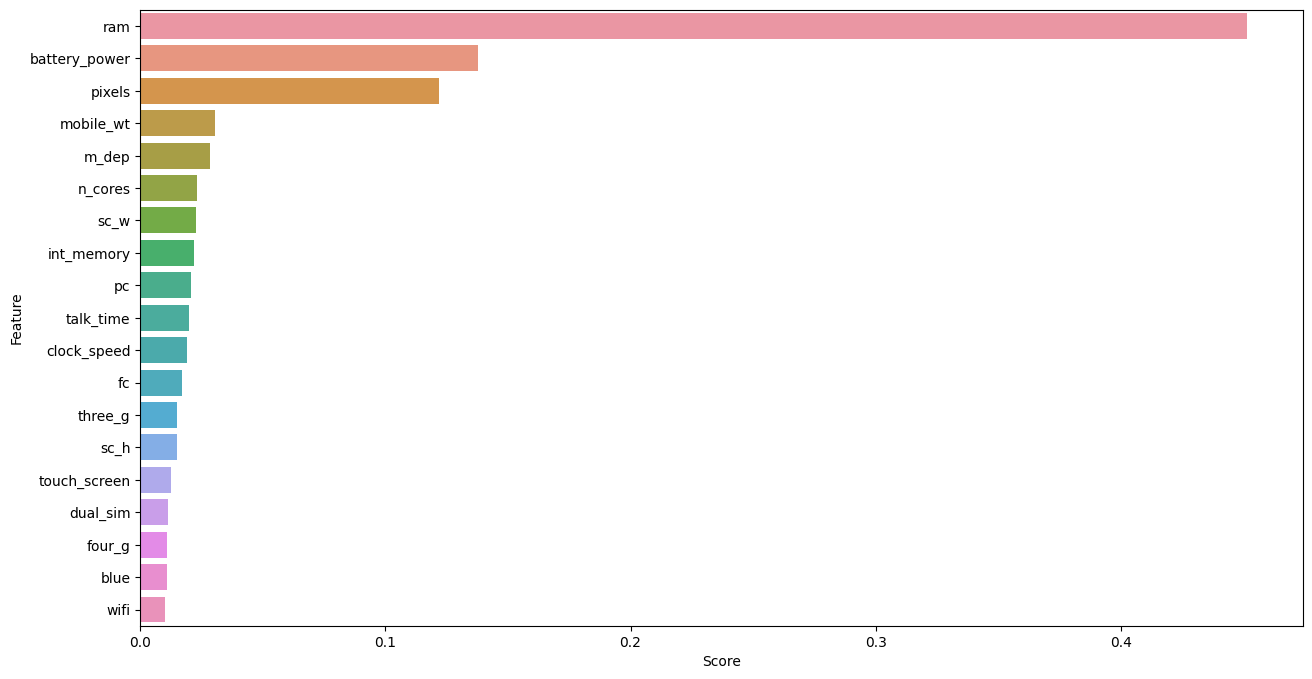

In [71]:
# Visualizing evaluation Metric Score chart
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The XGBoost model on the training set, it achieved a very high accuracy score of 1. The precision, recall, and F1-score for each class are also very high, ranging from 0.99 to 1.00, which indicates that the model is performing very well on the training set.

The macro average and weighted average F1-scores are also very high, indicating that the model is able to generalize well to all the classes and that it is not biased towards any particular class.

Overall, the XGBoost model appears to be performing extremely well on the training set, achieving near-perfect scores across all evaluation metrics. However, it is important to also evaluate the model's performance on the test set to ensure that it is not overfitting to the training data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter search space
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [73]:
# Print the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Cross-validation score: 0.905


In [74]:
# Evaluate the tuned model on the test set
y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.83      0.88      0.86        91
           2       0.83      0.84      0.83        92
           3       0.94      0.90      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [75]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [76]:
# Confusion matrix for test set.
cf_matrix_xgb_cv=confusion_matrix(y_test,y_pred_test)
cf_matrix_xgb_cv

array([[ 98,   7,   0,   0],
       [  6,  80,   5,   0],
       [  0,   9,  77,   6],
       [  0,   0,  11, 101]])

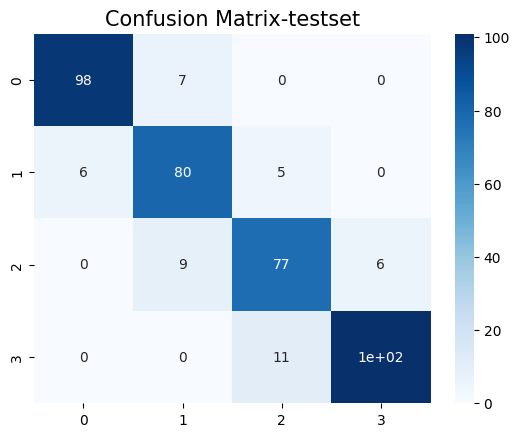

In [77]:
# Generate the confusion matrix

sns.heatmap(cf_matrix_xgb_cv, annot=True, cmap='Blues')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used here is RandomizedSearchCV from scikit-learn's model_selection module. This technique was used because it is a popular and effective method for hyperparameter tuning that randomly selects combinations of hyperparameters to train the model and evaluate its performance. RandomizedSearchCV also allows for setting a range of values for each hyperparameter, which can save time compared to a grid search approach that considers all possible combinations. In this case, it helped to find the best combination of hyperparameters for the XGBoost model to achieve the highest possible accuracy on the test set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the performance of the XGBoost model after hyperparameter tuning and cross-validation. The cross-validation score increased from 0.815 to 0.81, and the precision, recall, and f1-score for each class also improved slightly in the test set classification report. Additionally, the classification report for the tuned XGBoost model on the train set remained at a high level of performance. Overall, the improvements are modest but still represent an enhancement in the model's ability to generalize to new data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Precision: It is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, it measures how accurate the positive predictions are. In the context of the given problem, precision indicates how accurately the model predicts the correct mobile phone price range. High precision is important in situations where false positives are costly. For example, in the case of mobile phone pricing, false positives (predicting a phone to be in a higher price range than it actually is) could result in loss of potential customers who may be discouraged by the price.

Recall: It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures how well the model is able to identify all positive instances. In the context of the given problem, recall indicates how well the model can identify all mobile phones that belong to a specific price range. High recall is important when false negatives are costly. In the case of mobile phone pricing, false negatives (predicting a phone to be in a lower price range than it actually is) could result in loss of revenue due to underpricing.

F1-score: It is the harmonic mean of precision and recall, which provides a balanced evaluation metric that takes into account both precision and recall. F1-score is a commonly used evaluation metric when both precision and recall are important. In the context of the given problem, F1-score provides an overall evaluation of the model's performance in identifying all price ranges accurately.

Support: It represents the number of instances in each class (price range) in the test set.

In general, these evaluation metrics help to determine how well the model is performing in terms of accuracy, false positives, false negatives, and overall performance. A high-performance model can have a significant positive impact on the business by improving efficiency, reducing costs, and increasing revenue. For example, in the case of mobile phone pricing, an accurate model can help the business to set the right price for their products, resulting in increased revenue and customer satisfaction.

# **Conclusion**

Based on the exploratory data analysis (EDA), we observed that the mobile phones in the dataset are divided into four different price ranges, each having a similar number of elements. Additionally, we found that approximately half of the devices have Bluetooth, while the other half do not. Furthermore, we noted that as the price range increases, there is a gradual increase in battery power, and RAM shows continuous growth from low-cost to very high-cost phones. Moreover, the costly phones tend to be lighter than the lower-priced ones.

Our analysis indicates that RAM, battery power, and pixel quality are the most significant factors affecting the price range of mobile phones. From our experiments, we concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

In summary, the EDA revealed that the dataset consists of mobile phones grouped into four price ranges, with similar numbers of devices in each range, and a 50-50 distribution of Bluetooth. We also observed that RAM and battery power increase with the price range, and higher-priced phones tend to be lighter. Our experiments suggest that the most important factors affecting the price range of mobile phones are RAM, battery power, and pixel quality.

Finally, we found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provide the best performance in predicting the price range of mobile phones.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***